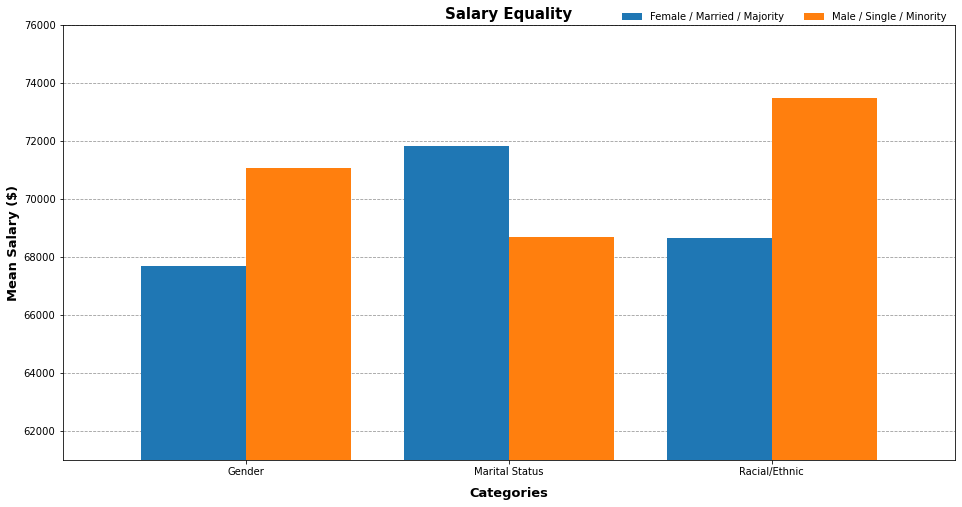

╒════════════════╤═══════════════════════════════╤════════════════════════════╕
│ Category       │ Female / Married / Majority   │ Male / Single / Minority   │
╞════════════════╪═══════════════════════════════╪════════════════════════════╡
│ Gender         │ $67,686.53                    │ $71,063.81                 │
├────────────────┼───────────────────────────────┼────────────────────────────┤
│ Marital Status │ $71,827.85                    │ $68,702.28                 │
├────────────────┼───────────────────────────────┼────────────────────────────┤
│ Racial/Ethnic  │ $68,634.10                    │ $73,478.08                 │
╘════════════════╧═══════════════════════════════╧════════════════════════════╛


In [1]:
# Part (b) Chart 1

# Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# States the variables on the X and Y axis
Labels = ['Gender','Marital Status','Racial/Ethnic']
Yblue = [67686, 71827, 68634]
Yorange = [71063, 68702, 73478]

# Expands chart size
fig, ax = plt.subplots(1, figsize=(16, 8))

# Creates a range or array of values on the x axis
X_axis = np.arange(len(Labels))
plt.xticks(X_axis, Labels)

# Plots a bar chart for both Bar Charts X and Y and plots legend
plt.bar(X_axis - 0.2, Yblue, 0.4, label = 'Female / Married / Majority')
plt.bar(X_axis + 0.2, Yorange, 0.4, label = 'Male / Single / Minority')

# Change the current limits of both x and y axis
plt.ylim(61000,76000)
plt.xlim(-0.7, 2.7)

# Creates the data labels
plt.ylabel("Mean Salary ($)", fontweight='bold', fontsize=13, labelpad=10, verticalalignment='center')
plt.xlabel("Categories", fontweight='bold', fontsize=13, labelpad=10, horizontalalignment='center')
plt.title("Salary Equality", fontweight='bold', fontsize=15, horizontalalignment='center')

# Creates Grids
ax.set_axisbelow(True)
ax.yaxis.grid(color='grey', linestyle='dashed', alpha=0.8)

# Show the legend and graph
plt.legend(ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.show()

# Next we create the datatable by importing tabulate
from tabulate import tabulate

# We create the table using a dictionary and print it
info = {'Category': ['Gender', 'Marital Status', 'Racial/Ethnic'], 'Female / Married / Majority': ['$67,686.53', '$71,827.85', '$68,634.10'], 'Male / Single / Minority': ['$71,063.81', '$68,702.28', '$73,478.08']}
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

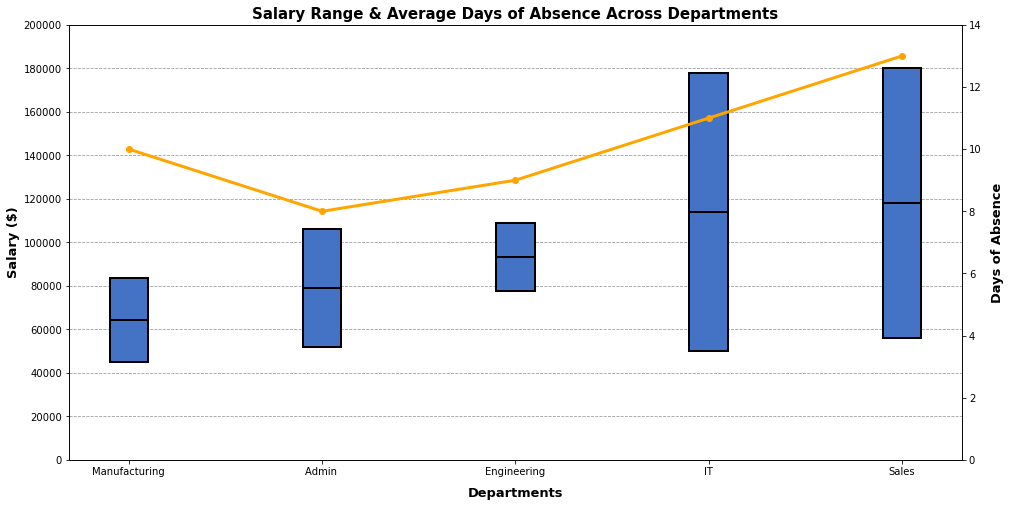

,Unit,maximum_salary,midpoint_salary,minimum_salary,Absence
0,Manufacturing,83667,45046,64356,10
1,Admin,106367,51920,79144,8
2,Engineering,108987,77692,93340,9
3,IT,178000,50178,114089,11
4,Sales,180000,55875,117937,13


In [3]:
# Part (b) Chart 2

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reads data from file
PATH = r"TMA_Data.csv"
DF = pd.read_csv(PATH)

# Defines the different Departments
Units = ['Manufacturing', 'Admin ', 'Engineering', 'IT', 'Sales']

# Convert lists to dict
my_dict = {'Unit': Units,
           'maximum_salary' : [],
           'midpoint_salary': [],
           'minimum_salary' : [],
           'Absence': [],
           'bar_val' : []
          }

# Manipulate/calculate values and store into dictionary
for unit in Units:
    df_u = DF[DF["Unit"]==unit]
    max_val = df_u["Salary"].max()
    min_val = df_u["Salary"].min()
    
    full_bar = max_val-min_val
    half_bar = int(round((max_val-min_val)/2,0))
    midpoint_val = min_val + half_bar
    avg_absence = int(round(df_u["Absence"].mean(),0))
    
    my_dict["maximum_salary"]  = my_dict["maximum_salary"] + [max_val]
    my_dict["midpoint_salary"] = my_dict["midpoint_salary"] + [min_val]
    my_dict["minimum_salary"]  = my_dict["minimum_salary"] + [midpoint_val]
    my_dict["Absence"]         = my_dict["Absence"] + [avg_absence]
    my_dict["bar_val"]         = my_dict["bar_val"] + [half_bar]

    
# Converts dict to Dataframe / df
result_df = pd.DataFrame(my_dict)

# Creates a blank canvas
fig, ax = plt.subplots(1, figsize=(16, 8))

# Next, we plot 2 bars, first to offset the midpoint salary, the second to offset the minimum salary
bar1 = plt.bar(result_df.index, result_df['bar_val'], bottom = result_df['midpoint_salary'], color = '#4472C4', edgecolor = "black", linewidth = 2, width = 0.2)
bar2 = plt.bar(result_df.index, result_df['bar_val'], bottom = result_df['minimum_salary'], color = '#4472C4', edgecolor = "black", linewidth = 2, width = 0.2)

# Creates the axis ticks by using index to return the position of the element
plt.xticks(result_df.index , labels = Units)
plt.yticks([0]+list(np.linspace(20000,200000,10)))

# Creates the data labels
plt.ylabel("Salary ($)", fontweight='bold', fontsize=13, labelpad=10, verticalalignment='center')
plt.xlabel("Departments", fontweight='bold', fontsize='13', labelpad=10, horizontalalignment='center')
plt.title("Salary Range & Average Days of Absence Across Departments", fontweight='bold', fontsize='15', horizontalalignment='center')

# Creates the secondary axis
# Clone the x-axis
ax2 = ax.twinx()

# Plots line and points
ax2.plot(Units,my_dict["Absence"], color='orange', linewidth=3)
ax2.scatter(Units,my_dict["Absence"], color='orange')

# Define the y-axis values and y axis
plt.yticks(list(np.linspace(0,14,8)))
plt.ylabel("Days of Absence", fontweight='bold', fontsize=13, labelpad=10)

# Creates Grids
ax.set_axisbelow(True)
ax.yaxis.grid(color='grey', linestyle='dashed', alpha=0.8)

# Shows the plot
plt.show()

# Creates a table to show the results
result_df.iloc[:,:-1]

In [4]:
# Part C

# Fills the LeftDate Column with default date
default_date = "2022-05-01"
DF["LeftDate"] = DF["LeftDate"].fillna(pd.to_datetime(default_date))

# Converts both columns to datetime format for easier manipulation
DF["LeftDate"] = pd.to_datetime(DF["LeftDate"])
DF["JoinDate"] = pd.to_datetime(DF["JoinDate"])

# Calculates the length of service
DF["Length_of_service"] = DF["LeftDate"] - DF["JoinDate"]

# Calculates & prints the results
print("Length of service info:")
print("Minimum :", round(DF["Length_of_service"].min().days/365 ,1), "Years")
print("Maximum :", round(DF["Length_of_service"].max().days/365 ,1), "Years")
print("Average :", round(DF["Length_of_service"].mean().days/365,1), "Years")

Length of service info:
Minimum : 0.1 Years
Maximum : 16.3 Years
Average : 6.8 Years


In [ ]:
# Part D

# This is the start of the program:

## Welcome to ABC Organisation's HR Management Portal
### Please complete the query below to find out more information about employees

In [7]:
# Import libraries
import pandas as pd

# Reads data from file and create dictionary since we are using key-value pairs
PATH = r"TMA_Data.csv"
df = pd.read_csv(PATH)
mydict = df.set_index('Staff')['PerformanceScore'].to_dict()

# Checks if user wants to check database
while True:
    input_check = str(input("Would you like to check the database? (Yes/No): "))
    
    # For user to input name
    if input_check == "Yes":
        input_name = str(input("Please enter the name of staff you want to check: "))
        
        # If user's name is found, prompts second question
        if input_name in df['Staff'].values:
            print(input_name, "is in the organisation's records!")
            input_perfcheck = str(input("Would you like to know his/her performance score? (Yes/No): "))
            
            # Pulls value from dictionary using key
            if input_perfcheck == "Yes":
                print(input_name, "obtained a performance grade of:", mydict.get(input_name))
               
                input_checkagain = str(input("Would you like to search another?: "))
                
                if input_checkagain == "Yes":
                    print("Please start a new query")
                    
                else:
                    print("Goodbye")
                    break
            
            # If second question is denied, break
            else:
                print("Goodbye")
                break
        
        # If user's name is not found in dataset    
        else:
              print(input_name, "is NOT in the organization's records!")
    
    # Breaks when user does not want to check database
    if input_check == "No":
        input_name = print("Goodbye")
        break

Would you like to check the database? (Yes/No): Yes
Please enter the name of staff you want to check: Anees Wallis
Anees Wallis is in the organisation's records!
Would you like to know his/her performance score? (Yes/No): Yes
Anees Wallis obtained a performance grade of: Meet
Would you like to search another?: Yes
Please start a new query
Would you like to check the database? (Yes/No): Yes
Please enter the name of staff you want to check: Anees
Anees is NOT in the organization's records!
Would you like to check the database? (Yes/No): No
Goodbye
